# Assignment 0: PyTorch Tutorial

Based on the tutorials by Sandeep Subramanian, Chin-Wei Huang, and Krishna Murthy for IFT6135 in 2018, 2019, 2020, and 2021
and on the Stanford tutorial by Dilara Soylu for CS224N : https://stanford.edu/class/cs224n/materials/CS224N_PyTorch_Tutorial.html

**Best reference when coding is the PyTorch official documentation:** https://pytorch.org/docs/stable/index.html

In [3]:
from IPython.display import display, HTML
display(HTML(
"""
<a target="_blank" href="https://colab.research.google.com/github/RedaBensaidDS/ELE6310E/A0/PyTorch_Tutorial_(ELE6310E).ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
"""
))

# 1. The torch tensor library

**A numpy equivalent with GPU and automatic differentiation support**

In [1]:
import torch
import numpy as np
# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

In [2]:
print(torch.__version__)
print(torch.cuda.is_available())

2.1.0+cu121
True


### Tensors and important attributes

The central data structure in PyTorch is a `Tensor` -- an n-dimensional array.

In [3]:
# Create a 2-dimensional tensor (i.e., a matrix) of shape (5, 3)
torch.Tensor(5, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Tensor attributes describe their shape, datatype, and the device on which they are stored.

In [4]:
tensor = torch.rand(3, 4, 5)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")
#print(f"req: {tensor.requires_grad}")

Shape of tensor: torch.Size([3, 4, 5])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In PyTorch we can index tensors, similar to NumPy.



In [5]:
print(tensor)
# Get the top left element of each element in our tensor
print(tensor[:, 0, 0])

tensor([[[7.0845e-01, 6.9943e-01, 2.7070e-01, 1.8264e-01, 3.0155e-01],
         [4.6897e-03, 6.1112e-01, 5.2582e-02, 2.2253e-01, 2.0529e-01],
         [5.1028e-01, 6.0639e-01, 5.4983e-01, 3.0703e-01, 7.7610e-01],
         [5.4238e-01, 3.3313e-01, 5.9093e-01, 7.3174e-01, 4.9000e-01]],

        [[1.7637e-02, 8.1934e-01, 2.7512e-01, 1.5183e-01, 5.9774e-01],
         [9.4738e-01, 4.8722e-01, 9.1298e-01, 5.8306e-01, 7.1050e-01],
         [4.1788e-01, 3.8329e-01, 9.1179e-01, 2.0101e-01, 7.3969e-05],
         [1.1028e-02, 2.2425e-01, 8.5992e-01, 5.3097e-01, 3.8249e-01]],

        [[5.1363e-01, 1.6690e-01, 3.9195e-01, 2.5314e-01, 4.7119e-01],
         [3.5739e-02, 6.1833e-01, 5.3225e-01, 3.3668e-01, 4.9766e-01],
         [6.0862e-02, 2.7961e-04, 3.6195e-01, 8.0996e-01, 6.9321e-02],
         [6.3991e-01, 1.1694e-01, 7.2030e-01, 5.3872e-01, 3.4167e-01]]])
tensor([0.7084, 0.0176, 0.5136])


Tensors can be initialized in multiple ways:
* Constant values (zeros, ones, etc.)
* Randomly-sampled values
* Special tensor types (identity matrices, diagonal matrices, etc.)
* Read values from python lists or numpy arrays

In [6]:
# Tensor of shape (5, 3) with all values set to 0
print(torch.Tensor(5, 3).zero_())
# Tensor of shape (5, 3) with all values set to 1
print(torch.Tensor(5, 3).fill_(1))
# Tensor of shape (5, 3) with values sampled from a uniform dist in [-1, 1]
print(torch.Tensor(5, 3).uniform_(-1, 1))
# Tensor of shape (5, 3) with values sampled from a normal dist
print(torch.randn(5, 3))
# TO DO : a Tensor of shape(5,5) corresponding to the identity matrix

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[-0.6999,  0.8554, -0.3755],
        [-0.2788,  0.9919,  0.3635],
        [-0.0974, -0.0354,  0.9439],
        [-0.5452,  0.1670, -0.3642],
        [-0.8362, -0.4153, -0.2873]])
tensor([[ 0.2941, -0.5462,  1.2741],
        [-0.6912,  0.9612, -0.1760],
        [-1.0832, -0.0014,  0.6311],
        [-0.1918,  0.2012,  0.4954],
        [-1.4024, -0.4844, -0.2615]])


**Tensor Types**

More details: http://pytorch.org/docs/stable/tensors.html

| Data type | `dtype` | CPU tensor class | GPU tensor class |
|-----------|---------|------------|------------|
| 32-bit floating point | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` | `torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 16-bit floating point | `torch.bfloat16` | `torch.BFloat16Tensor` | `torch.cuda.BFloat16Tensor` |
| 32-bit complex | `torch.complex32` | | |
| 64-bit complex | `torch.complex64` | | |
| 128-bit complex | `torch.complex128` or `torch.cdouble` | | |
| 8-bit integer (unsigned) | `torch.uint8` | `torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer (signed) | `torch.int8` | `torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer (signed) | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer (signed) | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer (signed) | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor` |
| Boolean | `torch.bool` | `torch.BoolTensor` | `torch.cuda.BoolTensor` |

Create tensor from python lists

In [7]:
# Create a tensor from list
z = torch.LongTensor([[[1], [3]], [[2], [9]]])  # the type's constructor
print(z.type(), z.dtype)
z = torch.tensor([[1, 3], [2, 9]])  # tensor construction function
print(z.type(), z.dtype)

torch.LongTensor torch.int64
torch.LongTensor torch.int64


Create tensor from numpy arrays

In [8]:
import numpy as np
data = [
        [0, 1],
        [2, 3],
        [4, 5]
       ]
# Initialize a tensor from a NumPy array
ndarray = np.array(data)
x_numpy = torch.from_numpy(ndarray)

# Print the tensor
x_numpy

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [9]:
# We can get a Python scalar value from a tensor with item().
x = torch.randn(3,3)
print(x)
y = x[0,0]
print(y)
print(y.item())

tensor([[ 0.9244, -0.2980, -0.8913],
        [-0.0723,  1.0775, -0.1114],
        [-0.4462,  0.0433, -0.8711]])
tensor(0.9244)
0.924437403678894


We can also create a tensor with torch.arange(end), which returns a 1-D tensor with elements ranging from 0 to end-1. We can use the optional start and step parameters to create tensors with different ranges.

In [10]:
# Create a tensor with values 0-9
x = torch.arange(10)
print(x)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


`torch.tensor()` and `torch.Tensor()` are different!
See [this link](https://stackoverflow.com/questions/51911749/what-is-the-difference-between-torch-tensor-and-torch-tensor) for an explanation.

In [11]:
# torch.tensor() is a function that returns a torch.Tensor object
z = torch.tensor([[1, 3], [2, 9]])
print(z.dtype)
# torch.Tensor is a constructor for the Tensor class
z = torch.Tensor([[1, 3], [2, 9]])  # torch.Tensor = torch.FloatTensor
print(z.dtype)
z = torch.FloatTensor([[1, 3], [2, 9]])
print(z.dtype)
z = torch.Tensor([1, 3])
print(z)
z = torch.Tensor(1, 3) # torch.Tensor = torch.empty
print(z)
z = torch.empty(1, 3)
print(z)

torch.int64
torch.float32
torch.float32
tensor([1., 3.])
tensor([[5.3646e-22, 3.1620e-41, 5.3647e-22]])
tensor([[5.3835e-25, 3.1620e-41, 5.3667e-22]])


In [12]:
z1 = torch.tensor([[1, 3], [2, 9]])
z2= torch.Tensor([[1, 3], [2, 9]])
(z1+z2).dtype

torch.float32

we can change the shape of a tensor with the view() method.


In [13]:
x = torch.arange(10)
print(x)
x_view = x.view(5, 2)
print(x_view)
# We can ask PyTorch to infer the size of a dimension with -1
x_view = x.view(-1, 2)
print(x_view)



tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])
tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])


We can also use torch.reshape() method for a similar purpose. There is a subtle difference between reshape() and view(). You can refer to this StackOverflow answer for more information : https://stackoverflow.com/questions/49643225/whats-the-difference-between-reshape-and-view-in-pytorch


In [14]:
x = torch.randn(5,2)
print(x.shape)
# TO DO : Add a new dimension of size 1 at the 1st dimension
print(x.shape)
# TO DO : Squeeze the dimensions of x by getting rid of all the dimensions with 1 element
x = x.squeeze()
print(x.shape)

torch.Size([5, 2])
torch.Size([5, 2])
torch.Size([5, 2])


For a more comprehensive and up-to-date list of tensor attributes, visit [this link](https://pytorch.org/docs/stable/tensor_attributes.html).

### Operations involving tensors

In [15]:
x = torch.Tensor(5, 3).uniform_(-1, 1)
power = torch.randn(5, 3)
y = torch.abs(x) ** power
print(y)

tensor([[ 1.1865,  1.0904,  1.0542],
        [ 6.3193,  0.2422,  0.7683],
        [ 0.8897,  0.1641,  1.0103],
        [ 0.9071,  1.1029,  1.5367],
        [17.1092,  0.8753,  1.6027]])


Multiplying tensors

In [16]:
tensor = torch.randn(5,5)
# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[6.3229e-01, 1.0410e+00, 1.7234e+00, 2.2374e+00, 9.7964e-02],
        [4.5207e-01, 2.2393e-01, 6.5571e-02, 1.3787e+00, 9.3382e-01],
        [1.3868e-01, 1.8466e+00, 1.2979e+00, 8.8070e-01, 1.2105e+00],
        [9.2617e-01, 1.1491e-02, 3.5426e+00, 1.0284e-01, 1.2367e-01],
        [1.2761e+00, 2.7474e-01, 1.9572e-01, 7.9340e-02, 8.6844e-04]]) 

tensor * tensor 
 tensor([[6.3229e-01, 1.0410e+00, 1.7234e+00, 2.2374e+00, 9.7964e-02],
        [4.5207e-01, 2.2393e-01, 6.5571e-02, 1.3787e+00, 9.3382e-01],
        [1.3868e-01, 1.8466e+00, 1.2979e+00, 8.8070e-01, 1.2105e+00],
        [9.2617e-01, 1.1491e-02, 3.5426e+00, 1.0284e-01, 1.2367e-01],
        [1.2761e+00, 2.7474e-01, 1.9572e-01, 7.9340e-02, 8.6844e-04]])


In [17]:
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[ 5.7321, -1.1695, -0.6541, -3.7151, -0.6479],
        [-1.1695,  3.0541,  1.5634,  0.8307, -0.8186],
        [-0.6541,  1.5634,  5.3745, -1.6692,  0.8608],
        [-3.7151,  0.8307, -1.6692,  4.7067, -0.1183],
        [-0.6479, -0.8186,  0.8608, -0.1183,  1.8267]]) 

tensor @ tensor.T 
 tensor([[ 5.7321, -1.1695, -0.6541, -3.7151, -0.6479],
        [-1.1695,  3.0541,  1.5634,  0.8307, -0.8186],
        [-0.6541,  1.5634,  5.3745, -1.6692,  0.8608],
        [-3.7151,  0.8307, -1.6692,  4.7067, -0.1183],
        [-0.6479, -0.8186,  0.8608, -0.1183,  1.8267]])


In [18]:
#TO DO : can we do operations with 2 tensors from 2 different devices ?

In [19]:
#TO DO : what happens when we add 2 tensors having 2 different dtype ?

We can take the mean and standard deviation along a certain dimension with the methods mean(dim) and std(dim). That is, if we want to get the mean 3x2 matrix in a 4x3x2 matrix, we would set the dim to be 0. We can call these methods with no parameter to get the mean and standard deviation for the whole tensor. To use mean and std our tensor should be a floating point type.



In [20]:
# Create an example tensor
m = torch.tensor(
    [
     [1., 1.],
     [2., 2.],
     [3., 3.],
     [4., 4.]
    ]
)

pp.pprint("Mean: {}".format(m.mean()))
pp.pprint("Mean in the 0th dimension: {}".format(m.mean(0)))
pp.pprint("Mean in the 1st dimension: {}".format(m.mean(1)))

'Mean: 2.5'
'Mean in the 0th dimension: tensor([2.5000, 2.5000])'
'Mean in the 1st dimension: tensor([1., 2., 3., 4.])'


We can concatenate tensors using torch.cat.


In [21]:
# Concatenate in dimension 0 and 1
a = torch.ones(3,2)
a_cat0 = torch.cat([a, a, a], dim=0)
a_cat1 = torch.cat([a, a, a], dim=1)

print("Initial shape: {}".format(a.shape))
print("Shape after concatenation in dimension 0: {}".format(a_cat0.shape))
print("Shape after concatenation in dimension 1: {}".format(a_cat1.shape))

Initial shape: torch.Size([3, 2])
Shape after concatenation in dimension 0: torch.Size([9, 2])
Shape after concatenation in dimension 1: torch.Size([3, 6])


# 2. PyTorch autograd



The torch autograd package provides automatic differentiation for all operations on Tensors. PyTorch's autograd is a reverse mode automatic differentiation system. Backprop is defined by how your code is run, and that every single iteration can be different.


Conceptually, autograd maintains a graph that records all of the operations performed on variables as you execute your operations. This results in a directed acyclic graph whose leaves are the input variables and roots are the output variables. By tracing this graph from roots to leaves, you can automatically compute the gradients using the chain rule. Let's see this graph in a tiny example.

In [22]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=0fab96ff3a46c0d5fb0ca9783ea2cee0edbc5f23f540524fa8ac053dac9f0c83
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


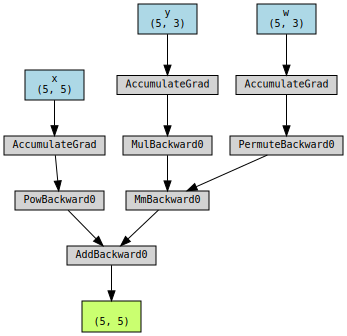

In [23]:
from torchviz import make_dot

x = torch.Tensor(5, 5).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
w = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
z = x ** 2 + 3 * y @ w.T

dict_param = {'x': x, 'y': y, 'w': w}
make_dot(z, params=dict_param)

Internally, autograd represents this graph as a graph of Function objects (really expressions), which can be `apply()` ed to compute the result of evaluating the graph. When computing the forward pass, autograd simultaneously performs the requested computations and builds up a graph representing the function that computes the gradient (the `.grad_fn` attribute of each Variable is an entry point into this graph). When the forward pass is completed, we evaluate this graph in the backwards pass to compute the gradients.

In [24]:
x = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(3, 5).uniform_(-1, 1)
z = torch.mm(x, y)
print(z.shape)
print(z.grad_fn)

torch.Size([5, 5])


Computing gradients will be done with `backward()` & `torch.autograd.grad` please note that calling `.backward()` multiple times will accumulate gradients into `.grad` and NOT overwrite them.

In [25]:
x = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
z = x ** 2 + 3 * y
z.backward(gradient=torch.ones(5, 3))
print(x.grad)

x.grad = None
y.grad = None
z = x ** 2 + 3 * y
o = z.sum()
o.backward()
print(x.grad)

tensor([[ 0.7201,  1.2088, -1.2818],
        [-1.8070, -1.1542,  0.0294],
        [-0.9555,  0.2062,  1.3058],
        [-0.7193, -1.5357, -1.9091],
        [ 1.2128,  0.1724,  1.0561]])
tensor([[ 0.7201,  1.2088, -1.2818],
        [-1.8070, -1.1542,  0.0294],
        [-0.9555,  0.2062,  1.3058],
        [-0.7193, -1.5357, -1.9091],
        [ 1.2128,  0.1724,  1.0561]])


In [26]:
x = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
y = torch.Tensor(5, 3).uniform_(-1, 1).requires_grad_()
z = x ** 2 + 3 * y
dz_dx = torch.autograd.grad(z, x, grad_outputs=torch.ones(5, 3))
dz_dy = torch.autograd.grad(z, y, grad_outputs=torch.ones(5, 3))
print(dz_dy)

(tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]]),)


# 3. `torch.nn`: The Neural Network module

In [27]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.nn.functional as F
import torch.optim as optim

Neural networks can be constructed using the `torch.nn` package.

Provides building blocks for neural networks, such as:

1. Linear layers - `nn.Linear`, `nn.Bilinear`
2. Convolution Layers - `nn.Conv1d`, `nn.Conv2d`, `nn.Conv3d`, `nn.ConvTranspose2d`
3. Nonlinearities - `nn.Sigmoid`, `nn.Tanh`, `nn.ReLU`, `nn.LeakyReLU`
4. Pooling Layers - `nn.MaxPool1d`, `nn.AveragePool2d`
4. Recurrent Networks - `nn.LSTM`, `nn.GRU`
5. Normalization - `nn.BatchNorm2d`
6. Dropout - `nn.Dropout`, `nn.Dropout2d`
7. Embedding - `nn.Embedding`
8. Loss Functions - `nn.MSELoss`, `nn.CrossEntropyLoss`, `nn.NLLLoss`

and more! See [`torch.nn` docs](https://pytorch.org/docs/stable/nn.html) for details.

Instances of these classes will have an `__call__` function built-in that can be used to run an input through the layer.

**Linear, Bilinear, and Nonlinearities**

In [28]:
x = torch.randn(32, 10)
y = torch.randn(32, 30)

# Activation functions operate on each element seperately, so the shape of the tensors we get as an output are the same as the ones we pass in.
sigmoid = nn.Sigmoid()
output_sigmoid = sigmoid(x)
print('Sigmoid output size : ', output_sigmoid.size())

# z = x * W^T + b
linear = nn.Linear(in_features=10, out_features=20, bias=True)
output_linear = linear(x)  # equiv: linear.forward(x)
print('Linear output size : ', output_linear.size())

# z = y^T * W * x + b
bilinear = nn.Bilinear(in1_features=10, in2_features=30, out_features=50, bias=True)
output_bilinear = bilinear(x, y)
print('Bilinear output size : ', output_bilinear.size())

Sigmoid output size :  torch.Size([32, 10])
Linear output size :  torch.Size([32, 20])
Bilinear output size :  torch.Size([32, 50])


**Convolution, BatchNorm, and Pooling**

In [29]:
x = torch.randn(10, 3, 28, 28)  # NCHW

conv = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), stride=1, padding=1, bias=True)
# #bn = nn.BatchNorm2d(num_features=32)
pool = nn.MaxPool2d(kernel_size=(2, 2), stride=2)

output_conv = conv(x)
outpout_pool = pool(conv(x))

print('Conv output size : ', output_conv.size())
print('Pool output size : ', outpout_pool.size())

Conv output size :  torch.Size([10, 32, 28, 28])
Pool output size :  torch.Size([10, 32, 14, 14])


In [30]:
!nvidia-smi

Wed Jan  3 16:17:55 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [31]:
# https://github.com/pytorch/pytorch/issues/46377#issuecomment-709565914
import torch
import torch.nn as nn
from torch.cuda.amp import autocast, GradScaler
import time
from torchvision.models import resnet152

torch.backends.cudnn.benchmark = True


class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.resnet = resnet152()
        self.linear = nn.Sequential(nn.Linear(1000, 250),
                                    nn.Linear(250, 64),
                                    nn.Linear(64, 32),
                                    nn.Linear(32, 10),
                                    nn.ReLU())

    def forward(self, x):
        out = self.resnet(x)
        out = self.linear(out)

        return out


#dtype = torch.float16
dtype = torch.float32
batch_size = 32
x = torch.randn(batch_size, 3, 224, 224).cuda(0).to(dtype)
y = torch.randint(0, 10, (batch_size,)).cuda(0)
m = model().cuda(0).to(dtype)
criterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(m.parameters(), 1e-4)

# warmup
for _ in range(10):
    m.zero_grad()
    output = m(x)
    loss = criterion(output, y)
    loss.backward()

nb_iters = 100

torch.cuda.synchronize()
t0 = time.time()
for _ in range(nb_iters):
    m.zero_grad()
    output = m(x)
    loss = criterion(output, y)
    loss.backward()

torch.cuda.synchronize()
t1 = time.time()
print('{:.3f}ms per iter'.format((t1 - t0)/nb_iters * 1000.))

728.652ms per iter


\begin{array}{|c|c|c|}\hline\\
      & Tesla T4 & A100 \\ \hline
float16 & \text{290 ms per iter} & \text{243 ms per iter} \\ \hline
float32 & \text{699 ms per iter} & \text{322 ms per iter} \\ \hline
\end{array}

In [32]:
# TO DO : compare the runtime of inference of the resnet above between the CPU and GPU with different tensor sizes

In [33]:
#TO DO : show the parameters of the model resnet152 above and compute the total number of parameters and the total number of trainable parameters only

# 4. Image classification on CIFAR10

In [34]:
import random
from collections import OrderedDict, defaultdict

import numpy as np
import torch
from matplotlib import pyplot as plt
from torch import nn
from torch.optim import *
from torch.optim.lr_scheduler import *
from torch.utils.data import DataLoader
from torchvision.datasets import *
from torchvision.transforms import *
from tqdm.auto import tqdm

### Data
In this tutorial, we will use CIFAR-10 as our target dataset. This dataset contains images from 10 classes, where each image is of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

In [35]:
mean = [0.4914, 0.4822, 0.4465]
std = [0.2023, 0.1994, 0.2010]
train_transform = transforms.Compose([
                  transforms.RandomHorizontalFlip(),
                  transforms.RandomCrop(32, padding=4),
                  transforms.ToTensor(),
                  transforms.Normalize(mean, std)
              ])
test_transform = transforms.Compose([
                  transforms.ToTensor(),
                  transforms.Normalize(mean, std)
              ])
train_data = CIFAR10(root="data/cifar10", train=True, download=True,
                     transform=train_transform)
test_data = CIFAR10(root="data/cifar10", train=False, download=True,
                     transform=test_transform)

train_loader = DataLoader(train_data, batch_size=512, shuffle=True,
                          num_workers=0, pin_memory=True,)
test_loader = DataLoader(test_data, batch_size=512, shuffle=False,
                          num_workers=0, pin_memory=True,)

Files already downloaded and verified
Files already downloaded and verified


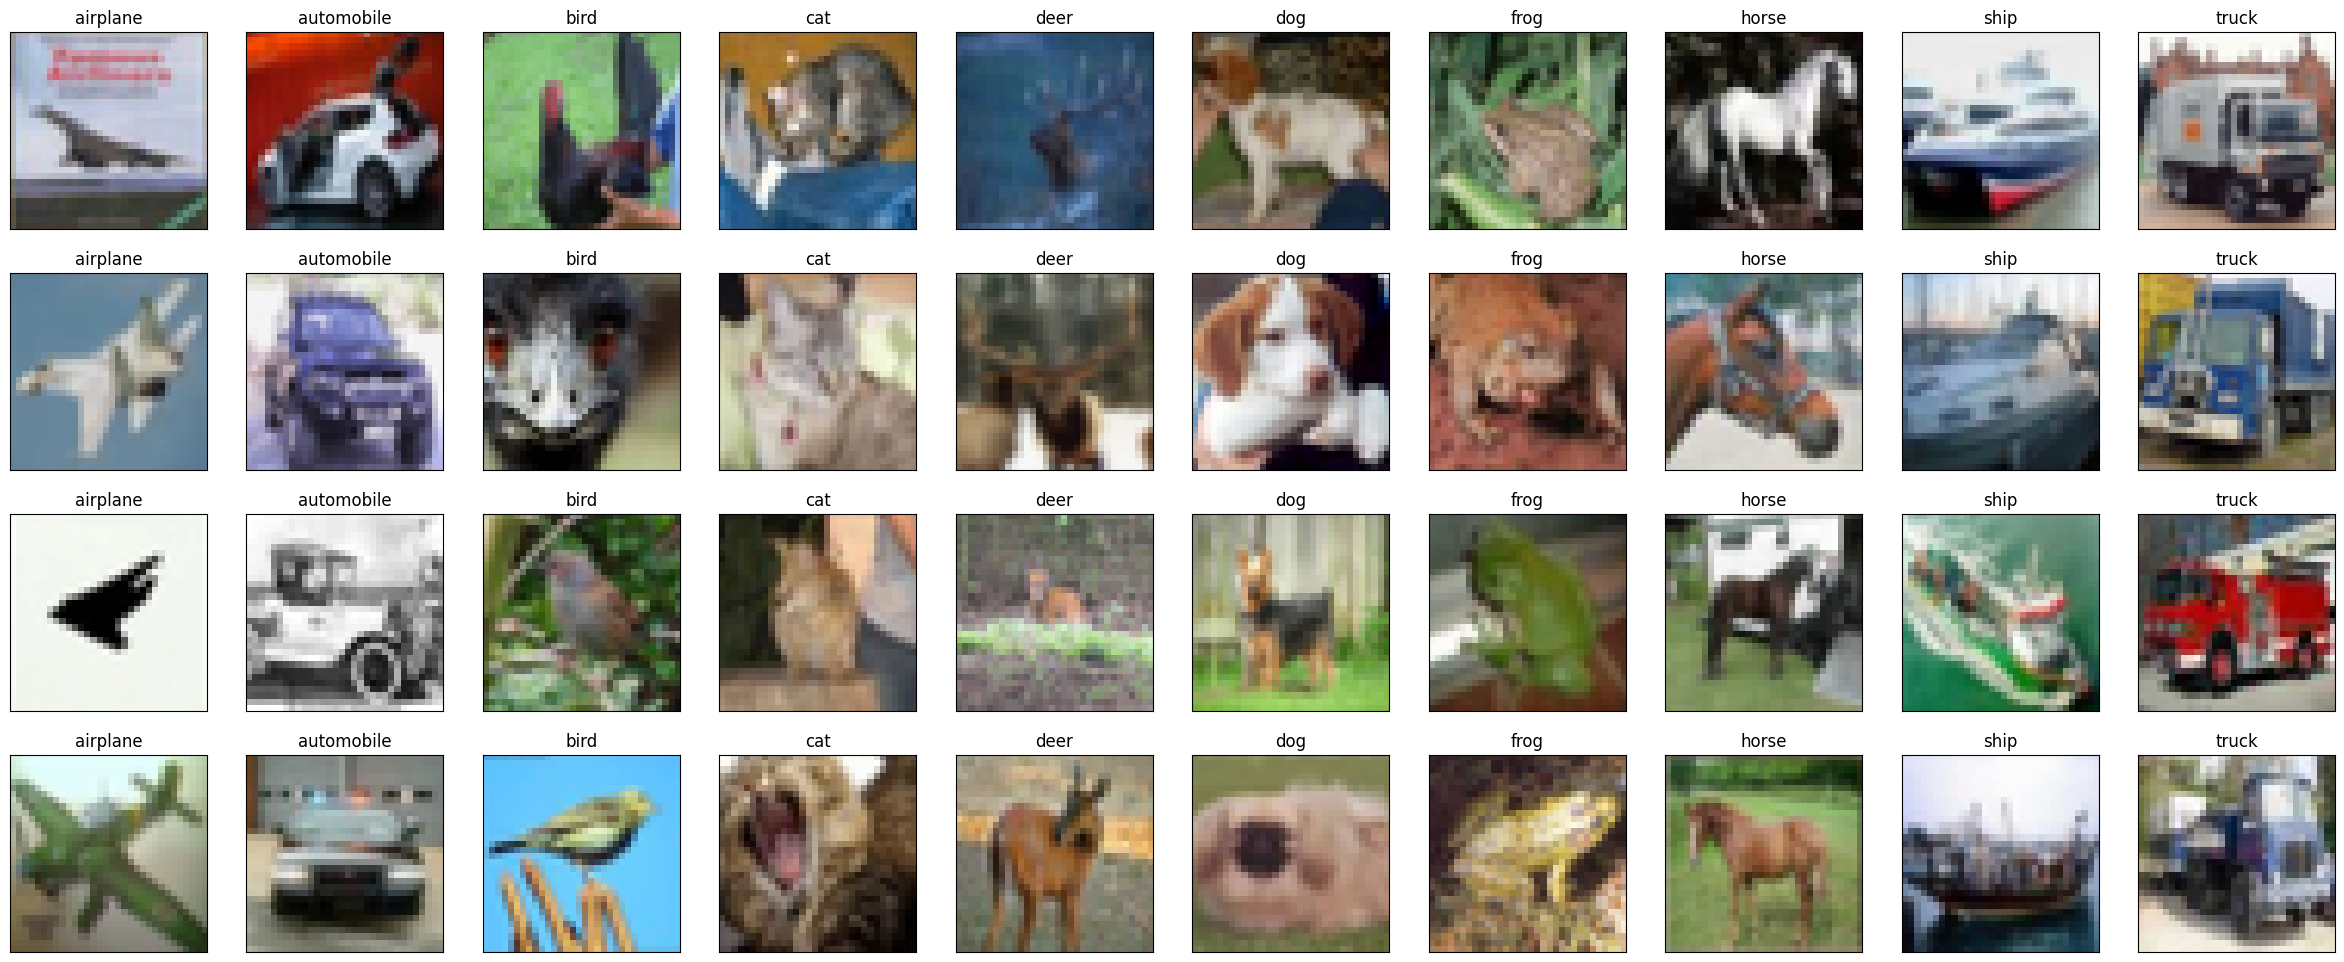

In [36]:
import torchvision.transforms.functional as F
def show_samples(test_data):
    samples = [[] for _ in range(10)]
    for image, label in test_data:
      if len(samples[label]) < 4:
        samples[label].append(image)

    #fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    fig, axes = plt.subplots(4, 10, squeeze=False, figsize=(10*3, 4*3))
    for i in range(10):
        for j in range(4):
            img = samples[i][j].detach()
            # unnormalize for visualization
            for c in range(img.shape[0]):
                img[c] = img[c]*std[c] + mean[c]
            img = F.to_pil_image(img)

            axes[j, i].imshow(np.asarray(img))
            axes[j, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
            axes[j, i].set_title(test_data.classes[i])

show_samples(test_data)

### Model
In this tutorial, we will use [ResNet9](https://www.kaggle.com/code/kmldas/cifar10-resnet-90-accuracy-less-than-5-min) as our model.

In [37]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
              nn.BatchNorm2d(out_channels),
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class ResNet9(nn.Module):
    def __init__(self, in_channels, num_classes):
        super().__init__()

        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))

        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Linear(512, num_classes))

    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

model = ResNet9(3, 10).to('cuda')

In [38]:
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

### Training

In [39]:
def train(
  model: nn.Module,
  train_loader: DataLoader,
  criterion: nn.Module,
  optimizer: Optimizer,
  scheduler: LambdaLR,
) -> None:
  model.train()
  for inputs, targets in train_loader:
    # Move the data from CPU to GPU
    inputs = inputs.cuda()
    targets = targets.cuda()

    # Reset the gradients (from the last iteration)
    optimizer.zero_grad()

    # Forward inference
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward propagation
    loss.backward()

    # Update optimizer and LR scheduler
    optimizer.step()
    scheduler.step()

@torch.inference_mode()
def evaluate(
  model: nn.Module,
  test_loader: DataLoader
) -> float:
  model.eval()

  num_samples = 0
  num_correct = 0

  for inputs, targets in test_loader:
    # Move the data from CPU to GPU
    inputs = inputs.cuda()
    targets = targets.cuda()
    # Inference
    outputs = model(inputs)

    # Convert logits to class indices
    outputs = outputs.argmax(dim=1)

    # Update metrics
    num_samples += targets.size(0)
    num_correct += (outputs == targets).sum()

  return (num_correct / num_samples * 100).item()


def fit(num_epochs: int, model: nn.Module, train_loader: DataLoader, test_loader: DataLoader,
        criterion: nn.Module, optimizer: Optimizer, scheduler: LambdaLR) -> None:
    test_accuracy = []
    train_accuracy = []
    for epoch_num in tqdm(range(1, num_epochs + 1)):
        train(model, train_loader, criterion, optimizer, scheduler)
        metric = evaluate(model, train_loader)
        train_accuracy.append(metric)
        metric = evaluate(model, test_loader)
        test_accuracy.append(metric)
        print(f"epoch {epoch_num}: train_accuracy={train_accuracy[-1]}, test_accuracy={test_accuracy[-1]}")

    return train_accuracy, test_accuracy

In [40]:
num_epochs = 10
max_lr = 0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( model.parameters(), lr=max_lr, weight_decay=1e-4)
sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=num_epochs, steps_per_epoch=len(train_loader))

In [41]:
train_accuracy, test_accuracy = fit(num_epochs, model, train_loader, test_loader, criterion, optimizer, sched)

  0%|          | 0/10 [00:00<?, ?it/s]

epoch 1: train_accuracy=58.04600143432617, test_accuracy=59.929996490478516
epoch 2: train_accuracy=56.12800216674805, test_accuracy=54.73999786376953
epoch 3: train_accuracy=73.04399871826172, test_accuracy=72.22000122070312
epoch 4: train_accuracy=73.20800018310547, test_accuracy=71.48999786376953
epoch 5: train_accuracy=81.1520004272461, test_accuracy=79.5999984741211
epoch 6: train_accuracy=86.69200134277344, test_accuracy=84.44999694824219
epoch 7: train_accuracy=89.44400024414062, test_accuracy=86.94999694824219
epoch 8: train_accuracy=91.38800048828125, test_accuracy=87.7699966430664
epoch 9: train_accuracy=95.46199798583984, test_accuracy=90.83000183105469
epoch 10: train_accuracy=96.05000305175781, test_accuracy=91.11000061035156


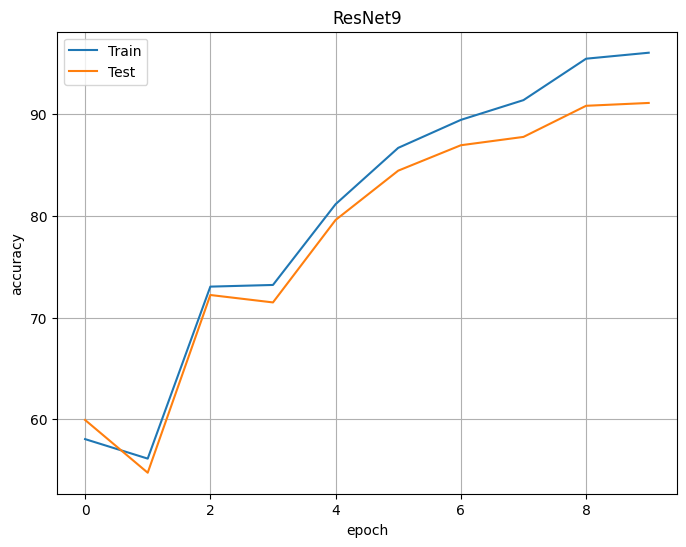

In [42]:
epoch = np.arange(len(train_accuracy))
plt.figure(figsize=(8,6))
plt.plot(epoch, train_accuracy, label='Train')
plt.plot(epoch, test_accuracy, label='Test')
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.title("ResNet9")
plt.grid()

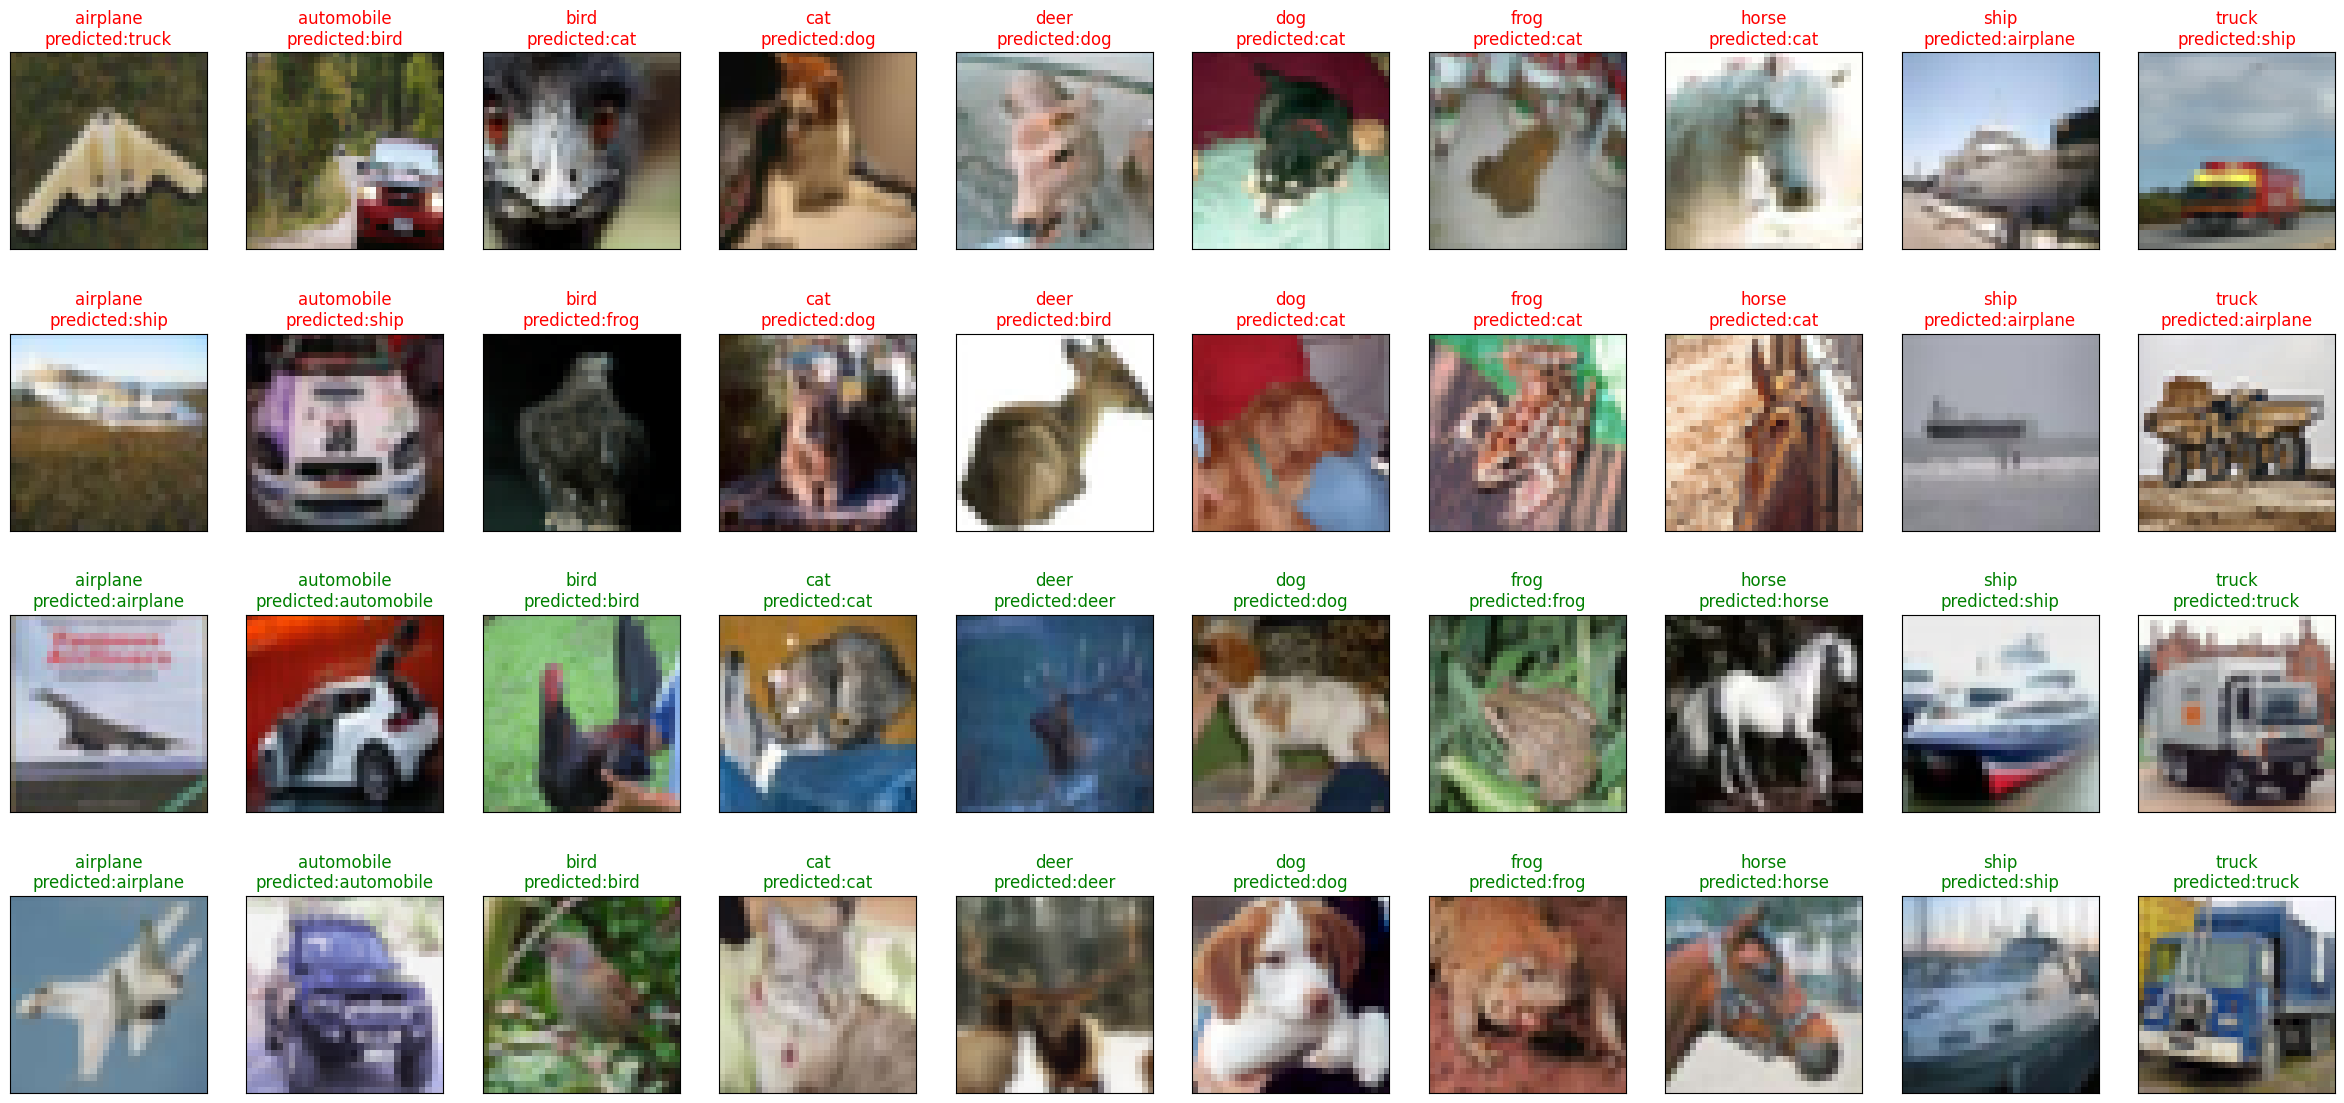

In [43]:
import torchvision.transforms.functional as F
def show_samples(test_data, model):
    samples_T = [[] for _ in range(10)]
    samples_F = [[] for _ in range(10)]
    for image, label in test_data:
      pred = model(image[None,:].to('cuda'))
      pred = torch.argmax(pred).item()
      if pred != label and len(samples_F[label])<2:
          samples_F[label].append(image)
      if pred == label and len(samples_T[label]) < 2:
        samples_T[label].append(image)

    fig, axes = plt.subplots(4, 10, squeeze=False, figsize=(10*3, 4*3.5))
    for i in range(10):
        for j in range(2):
            img = samples_F[i][j].detach()
            pred = model(img[None,:].to('cuda'))
            pred = torch.argmax(pred).item()
            for c in range(img.shape[0]):
                img[c] = img[c]*std[c] + mean[c]
            img = F.to_pil_image(img)
            axes[j, i].imshow(np.asarray(img))
            axes[j, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
            axes[j, i].set_title(test_data.classes[i]+f"\npredicted:{test_data.classes[pred]}", color='red')

            img = samples_T[i][j].detach()
            pred = model(img[None,:].to('cuda'))
            pred = torch.argmax(pred).item()
            for c in range(img.shape[0]):
                img[c] = img[c]*std[c] + mean[c]
            img = F.to_pil_image(img)
            axes[j+2, i].imshow(np.asarray(img))
            axes[j+2, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
            axes[j+2, i].set_title(test_data.classes[i]+f"\npredicted:{test_data.classes[pred]}", color='green')

show_samples(test_data, model)

In [46]:
#TO DO : Find which part of the model takes the most in memory consumption and CPU and GPU